# Задание 1. Разберемся в векторах

Вспоминаю самые важные команды для работы с массивами и тензорами.

In [66]:
import numpy as np

С пощью numpy мы можем превратить любой список в массив. Для этого используется функция `np.array(list)`. 

Например:

In [67]:
a = [1, 2, 3, 4]
example_array = np.array(a)

Проверка результата:

In [68]:
assert type(example_array) == np.ndarray, 'Something is wrong. Try again'

У массивов есть размеры. Для этого юзаем поле `.shape`:

In [69]:
example_array.shape

(4,)

Теперь попробуем создать двумерный массив. Для этого создадим `list_of_lists` и поместим его в `np.array()`

In [70]:
list_1 = [0, 1, 2, 3]
list_2 = [1, 2, 3, 4]
list_3 = [2, 3, 4, 5]

list_of_lists = [list_1, list_2, list_3]
array_2d = np.array(list_of_lists)
array_2d

array([[0, 1, 2, 3],
       [1, 2, 3, 4],
       [2, 3, 4, 5]])

Посмотрим на размеры переменной `array_2d`

In [71]:
array_2d.shape

(3, 4)

Проверка результата:

In [72]:
assert array_2d.shape == (3, 4), 'Something is wrong. Try again'

Как видим, у нас получился двумерный массив состоящий из 3х списков, в каждом из которых по 4 элемента.

Создадим трехмерный массив по аналогии с двумерным. Размеры (2, 3, 4)

In [73]:
list_1_1 = [0, 1, 2, 3]
list_2_1 = [1, 2, 3, 4]
list_3_1 = [2, 3, 4, 5]

list_1_2 = [9, 8, 7, 6]
list_2_2 = [8, 7, 6, 5]
list_3_2 = [7, 6, 5, 4]

list_of_lists_1 = [list_1_1, list_2_1, list_3_1]
list_of_lists_2 = [list_1_2, list_2_2, list_3_2]

list_of_lists_of_lists = [list_of_lists_1, list_of_lists_2]
array_3d = np.array(list_of_lists_of_lists)
array_3d

array([[[0, 1, 2, 3],
        [1, 2, 3, 4],
        [2, 3, 4, 5]],

       [[9, 8, 7, 6],
        [8, 7, 6, 5],
        [7, 6, 5, 4]]])

Проверка результата:

In [74]:
assert array_3d.shape == (2, 3, 4), 'Something is wrong. Try again'

Многомерный массив часто называют тензором, что, конечно, смешно, но да лан.

Как и с обычными числами, с векторами можно производить арифметические операции.
Выведем по очереди результат сложения матрицы `a` с объектами `b_1`, `b_2`, `b_3`.

In [75]:
a = np.array([[1, 2],
              [3, 4]])
b_1 = np.array([[1, 2],
                [3, 4]])
b_2 = np.array([1, 2])
b_3 = 1

print(a+b_1,a+b_2,a+b_3, sep='\n\n')

[[2 4]
 [6 8]]

[[2 4]
 [4 6]]

[[2 3]
 [4 5]]


Применим операцию `np.sum` к матрице `a` так, чтобы получить сумму всех элементов - `10`, сумму в столбцах - `[4, 6]` и сумму в строках - `[3, 7]`.

In [76]:
print(np.sum(a))
#print("По строкам: ",np.sum(a[0]), np.sum(a[1]))
print("По строкам: ",np.sum(a,axis=1))
print("По столбцам: ",np.sum(a,axis=0))

10
По строкам:  [3 7]
По столбцам:  [4 6]


А теперь приведем матрицу `а` к размерности (2, 2, 1)

In [77]:
print(a.shape)
#a.resize(2,2,1)
a=a.reshape(2,2,1)
print(a.shape)
a

(2, 2)
(2, 2, 1)


array([[[1],
        [2]],

       [[3],
        [4]]])

Проверка результата:

In [78]:
assert a.shape == (2, 2, 1), 'Something is wrong. Try again'

Теперь приведем матрицу `a` обратно к размерности (2, 2)

In [79]:
print(a.shape)
a=a.reshape(2,2)
print(a.shape) 
a


(2, 2, 1)
(2, 2)


array([[1, 2],
       [3, 4]])

Проверка результата:

In [80]:
assert a.shape == (2, 2), 'Something is wrong. Try again'

Приведем матрицу `а` к размерности (4)

In [81]:
print(a.shape)
a=a.reshape(4)
print(a.shape) 
a

(2, 2)
(4,)


array([1, 2, 3, 4])

Проверка результата:

In [82]:
assert a.shape == (4,), 'Something is wrong. Try again'

# Задание 2. Загрузка данных и работа с ними

Разобрались со списками, массивами и тензорами, теперь попробуем поработать с уже созданными данными.

Загрузим классический [Iris Data Set](https://archive.ics.uci.edu/ml/datasets/iris)

Удобный способ сделать это использовать модуль [sklearn.datasets](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris)

In [83]:
from sklearn.datasets import load_iris

# Download dataset
data, labels = load_iris(return_X_y=True)

И `data`, и `labels` - это N-мерные массивы. Посмотрим, какие у них размеры:

In [84]:
print(type(data),type(labels))
print(data.shape, labels.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(150, 4) (150,)


Видим, что массив `data` состоит из нескольких колонок -- это и есть наши фичи. Набор данных по ирисам содержит четыре характеристики (длина чашелистиков, ширина чашелистиков, длина лепестков, ширина лепестков) и 50 образцов трех видов ирисов (setosa, virginica и  versicolor). Вид ирисов отражен в массиве `labels`. 

Отфильтруем массив `data` таким образом, чтобы он содержал в себе только ирисы из класса `0`. Для этого будем юзать конструкцию `labels == class` в качестве индекса для `data`

In [85]:
data[labels==0]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

К сожалению, когда данных много, просто смотреть на цифры крайне не информативно. 

Для визуализации данных будем использовать библиотеку `matplotlib`.

In [86]:
import matplotlib.pyplot as plt

Теперь хочу построить на одном рисунке график признака с индексом 0 (sepal length in cm) для каждого из 3 классов (3 графика на одном рисунке). Для построения графика буду использовать функцию `plt.plot()`. Для того, чтобы получить доступ ко всем объектам в позиции 0 буду использовать index notation `[:, 0]`.

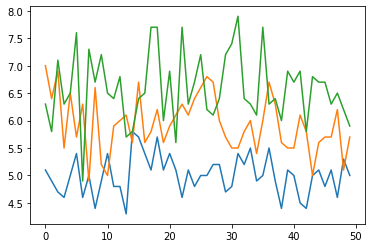

In [87]:
for i in range(3): 
    plt.plot(range(50), data[labels==i][:,0])


В `matplotlib` есть понятие `subplots`. Давайте создадим 3 `subplots` для наших классов

 Если мы посмотрим на `ax.shape`, мы обнаружим что это просто массив, который содержит в себе графические объекты. Соответственно, к каждому из этих `subplots` мы можем обращаться по индексу

Для каждого класса построим зависимость ширины от длины чашелистиков. 

Буду использовать `ax.scatter()`

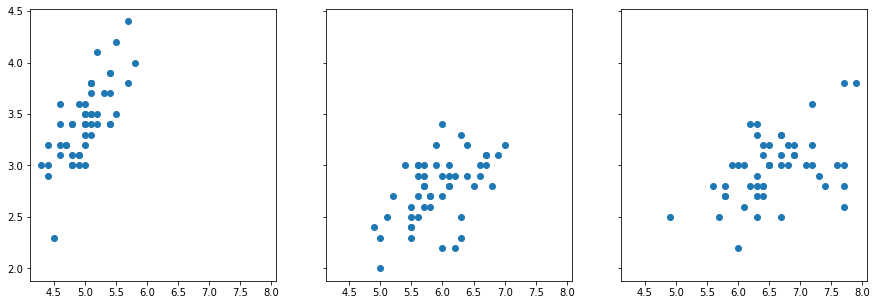

In [88]:
fig, ax = plt.subplots(ncols=3, figsize=(15, 5), sharex=True, sharey=True)
ax[0].scatter(data[labels==0][:,0], data[labels==0][:,1])
ax[1].scatter(data[labels==1][:,0], data[labels==1][:,1])
ax[2].scatter(data[labels==2][:,0], data[labels==2][:,1]) 
plt.show()

Визуализируем данные из iris dataset при помощи UMAP.

Каждый объект в датасете Iris содержит 4 признака и  него можно было посмотреть как на точку в 4-мерном пространстве. Про различные методы понижения размерности пространства признаков еще будут отдельные задания, а пока посмотрим, как один таких методов — [UMAP](https://umap-learn.readthedocs.io/en/latest/index.html) — можно использовать для получения двумерной аппроксимации пространства признаков датасета Iris:

In [89]:
! pip install umap-learn[plot]
from IPython.display import clear_output
clear_output()

In [90]:
import umap
import umap.plot
import pandas as pd

Рассмотрим двумерную проекцию данных при помощи UMAP:

In [91]:
mapper = umap.UMAP().fit(data)

annotation_on_plot = pd.DataFrame({'index':np.arange(len(data)),
                                   'label':labels,
                                   'sepal length in cm':data[:, 0],
                                   'sepal width in cm':data[:, 1],
                                   'petal length in cm':data[:, 2],
                                   'petal width in cm':data[:, 3]
                                   })

annotation_on_plot['item'] = annotation_on_plot.label.map(
    {
        0:'Setosa',
        1:'Versicolor',
        2:'Virginica'
    }
)

umap.plot.output_notebook()
p = umap.plot.interactive(mapper, labels=labels, point_size=10, 
                          hover_data=annotation_on_plot, theme='red')
umap.plot.show(p)

# Задание 3. Алгоритм Nearest Neighbors.



Напишу свой алгоритм Nearest Neighbor (т.е. KNN при K=1).


Разобьем наши данные на тренировочный и тестовый набор при помощи метода `train_test_split()`. Использую следующие аргументы `train_size=0.6`, `random_state=42`, `stratify=labels`.

In [92]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, labels, train_size=0.6, random_state=42, stratify=labels)


print("x_train", x_train.shape)
print("x_test", x_test.shape)

x_train (90, 4)
x_test (60, 4)


Пишу функцию, которая считает расстояние L1 между 2мя векторами:


In [93]:
def compute_L1(a, b):
    return np.linalg.norm(a - b, ord=1)

Беру первую строку из тестового набора. Посчитаем расстояние L1 от нее до всех строк тренировочного набора.

In [94]:
distances = np.array([compute_L1(x_test[0], y) for y in x_train])

Найдем индекс минимального расстояния, используя `np.argmin()`

In [95]:
indx = np.argmin(distances)

indx

20

Выведем на экран свойства первого ириса в тестовом наборе и ириса, который максимально на него похож в тренировочном (минимальное расстояние)

In [96]:
print(x_test[0])
print(x_train[indx])

[5.  3.5 1.3 0.3]
[5.1 3.5 1.4 0.3]


Выведем их метки

In [97]:
print(y_test[0], y_train[indx])

0 0


Посчитаем двумерный массив расстояний от каждого ириса в тестовом наборе до каждого ириса в тренировочном. Размерность массива должна получиться (60, 90)

In [98]:
def compute_distances(train, test, distance_func): #sklearn pairwise.... лучше так
    distances=np.eye(len(test), len(train))
    for i in range(len(test)):
        for j in range(len(train)):
            distances[i][j]=distance_func(test[i],train[j])
    return distances

In [99]:
distances = compute_distances(x_train, x_test, compute_L1)

In [100]:
distances.shape

(60, 90)

Теперь определим точность Nearest Neighbors классификации.

Для этого найдем индекс минимального значения для каждой строки массива distances:

In [101]:
indx_distances = [np.argmin(distances[i]) for i in range(60)]

Теперь создадим массив `predicted_class`

In [102]:
predicted_class = y_train[indx_distances]

И посмотрим, где класс предсказан правильно, а где нет:

In [103]:
y_test == predicted_class

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

Посчитаем точность (accuracy)

(Очевидно, в питоне с булевыми значениями можно производить математические операции (True = 1, False = 0) )

In [104]:
count=0
for i in range(len(y_test)):
    if(y_test[i]==predicted_class[i]):
        count=count+1
        
accuracy = count/len(y_test)
print(f'Accuracy = {accuracy * 100:.1f}%')

Accuracy = 93.3%


Повторим все этапы классификации, однако в этот раз стандартизуем данные перед этим.

In [105]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform( x_train )
x_test = scaler.transform( x_test )

In [106]:
distances = compute_distances(x_train, x_test, compute_L1)

In [107]:
min_distances = [np.argmin(distances[i]) for i in range(60)]
predicted_class = y_train[min_distances]

count=0
for i in range(len(y_test)):
    if(y_test[i]==predicted_class[i]):
        count=count+1
        
accuracy = count/len(y_test)
print(f'Accuracy = {accuracy * 100:.1f}%')

Accuracy = 95.0%


# Задание 4. Nearest Neighbors для картинок

Загрузим датасет с помощью функций torchvision:

In [108]:
from torchvision import datasets
import numpy as np

dataset = datasets.CIFAR10("content", train=True, download=True)

np.random.seed(42)
data, _, labels, _ = train_test_split(dataset.data / 255,  # Normalize
                                      np.array(dataset.targets),
                                      train_size=0.1, # get only fraction of the dataset
                                      random_state=42,
                                      stratify=dataset.targets)


Files already downloaded and verified


Посмотрим, что это за датасет такой

In [109]:
data.shape

(5000, 32, 32, 3)

CIFAR - 4х мерный массив (N, W, H, C). $N$ - количество картинок, $W$ - ширина картинки, $H$ - высота картинки, $C$ - количество каналов (RGB).

Создадим subplots с 2мя строками и 2мя колонками и отобразим 4 любых картинки из `data`. 
Будем использовать `plt.imshow()`

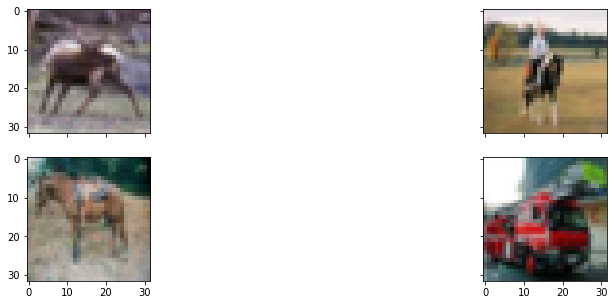

In [110]:
import matplotlib.pyplot as plt



fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 5), sharex=True, sharey=True)

ax[0, 0].imshow(data[0])
ax[0, 1].imshow(data[1])
ax[1, 0].imshow(data[2])
ax[1, 1].imshow(data[300])
plt.show()


Разобьем датасет на тренировочный и тестовый наборы. Укажем аргументы `random_state=42`, `stratify=labels`

In [111]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, labels, train_size=0.6, random_state=42, stratify=labels) 

print("x_train", x_train.shape)
print("x_test", x_test.shape)

x_train (3000, 32, 32, 3)
x_test (2000, 32, 32, 3)


Возьмем первую картинку из тестового набора и найдем ее ближайшего соседа из тренировочного

In [112]:

def compute_L1(a, b):
    return np.linalg.norm(a.flatten() - b.flatten(), ord=1)

In [113]:
distances = np.array([compute_L1(x_test[0], y) for y in x_train])

x_train.shape

(3000, 32, 32, 3)

In [114]:
indx = np.argmin(distances)
print(indx)

561


Отобразим эти картинки на subplots с ncols=2

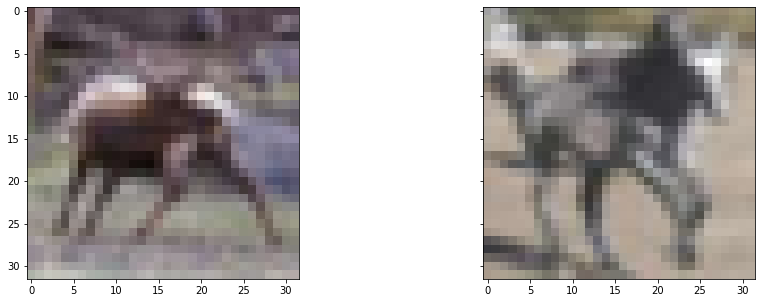

In [115]:
fig, ax = plt.subplots(ncols=2, figsize=(15, 5), sharex=True, sharey=True)
ax[0].imshow(data[0]) 
ax[1].imshow(data[indx])
plt.show()


Посмотрим, какой класс предсказывается

In [116]:
class_pred = y_train[indx]
class_to_idx = dataset.class_to_idx

print(list(class_to_idx.keys())[list(class_to_idx.values()).index(class_pred)])

cat


Возьмем первую картинку из тестового набора и найдем K ее ближайших соседей из тренировочного

In [117]:
k = 5
indx = np.argsort(distances)[0:k]
indx.shape

(5,)

Отобразим ближайших соседей в виде subplots

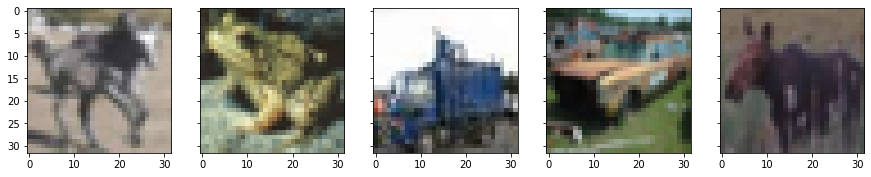

In [118]:
fig, ax = plt.subplots(ncols=k, figsize=(15, 5), sharex=True, sharey=True)
for i in range(k):
    ax[i].imshow(data[indx[i]])
plt.show()



Посчитаем KNN для всего датасета

Чем больше данных - тем дольше процесс. Реализуем функцию для расчета расстояний + *progress bars* с помощью tqdm.

Примечание: В случае вложенных циклов `tqdm` нужно использовать только на внешнем цикле. Иначе время работы существенно увеличится.

In [119]:
from tqdm.notebook import tqdm

In [120]:
def compute_distances(train, test, distance_func):
    distances=np.eye(len(test), len(train))
    for i in tqdm(range(len(test))):
        for j in range(len(train)):
            distances[i][j]=distance_func(test[i],train[j])
    return distances


In [121]:
distances = compute_distances(x_train, x_test, compute_L1)

  0%|          | 0/2000 [00:00<?, ?it/s]

In [122]:
print(distances.shape)
print(len(x_test))

(2000, 3000)
2000


In [123]:
min_distances = [np.argmin(distances[i]) for i in range(len(x_test))] 
predicted_class = y_train[min_distances]

count=0
for i in range(len(y_test)):
    if(y_test[i]==predicted_class[i]):
        count=count+1
        
accuracy = count/len(y_test)
print(f'Accuracy = {accuracy * 100:.1f}%')

Accuracy = 27.6%


Теперь найдем K ближайших соседей и предскажем класс. [scipy.stats.mode](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mode.html)

In [124]:
from scipy.stats import mode # потом подумаю, нужно ли это вообще тут


def get_accuracy(distances, train_labels, test_labels, k):
    min_distances = [np.argsort(distances[i])[0:k] for i in range(len(test_labels))] #список массивов. i-ый элемент списка это индексы k ближайших к x_test[i]
    
    predicted_class=[]
    for i in range(len(test_labels)): #в i-ой итерации смотрим на x_test[i]
        temp = train_labels[min_distances[i]] # такие классы у k ближайших соседов к x_test[i]
        predicted_class.append(np.bincount(temp).argmax())



    count=0
    for i in range(len(y_test)):
        if(test_labels[i]==predicted_class[i]):
            count=count+1
    return count/len(test_labels)

In [125]:
accuracy = get_accuracy(distances, y_train, y_test, k)
print(f'Accuracy = {accuracy * 100:.0f}%')

Accuracy = 29%


Посчитаем точность для k=1..100 и постройте график точности от k

In [126]:
acc = []
for k in tqdm(range(1, 101)):
    acc.append(get_accuracy(distances, y_train, y_test, k))

  0%|          | 0/100 [00:00<?, ?it/s]

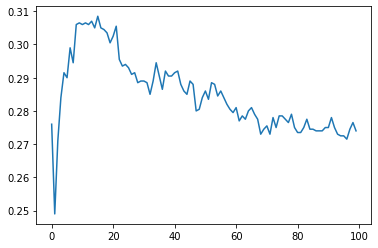

In [127]:
plt.plot(range(100),acc)
plt.show()

Поменяем расстоянние L1 на L2 и сравним точность на всем датасете.

In [128]:
def compute_L2(a, b):
    return np.linalg.norm(a.flatten() - b.flatten())

In [129]:
distances_l2 = compute_distances(x_train, x_test, compute_L2)

  0%|          | 0/2000 [00:00<?, ?it/s]

In [130]:
acc_l2 = []
for k in tqdm(range(1, 101)): 
    acc_l2.append(get_accuracy(distances_l2, y_train, y_test, k))

  0%|          | 0/100 [00:00<?, ?it/s]

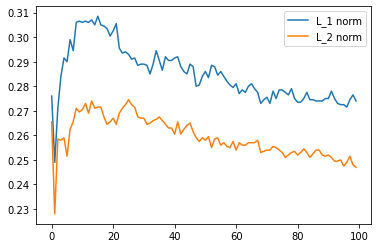

In [131]:
plt.plot(range(100),acc, label='L_1 norm')
plt.plot(range(100),acc_l2, label='L_2 norm')
plt.legend()
plt.show()

In [132]:
def argmax(iterable):
    return max(enumerate(iterable), key=lambda x: x[1])[0]

print("Лучшее k с L_1 нормой: ", argmax(acc))
print("Лучшее k с L_2 нормой: ", argmax(acc_l2))
#print(max(acc),acc[argmax(acc)])

Лучшее k с L_1 нормой:  15
Лучшее k с L_2 нормой:  25


# Задание 5. Реализация KNN

Часто KNN реализуют в концепции ООП. Полностью своими ручками создам класс KNN и реализую у него методы

In [133]:
class kNN:
    def __init__(self, k, distance_func):
        self.k = k 
        self.distance_func = distance_func 

    def fit(self, x, y):
        self.train_data = x
        self.train_labels = y 

    def predict(self, x):
        distances = self.compute_distances(x)
        indexes = np.argsort(distances, axis=1)[:, :self.k]
        labels_of_top_classes = self.train_labels[indexes]
        predicted_class, _ = mode(labels_of_top_classes, axis=1)
        return predicted_class.flatten()

    def compute_distances(self, test):
        distances=np.eye(len(test), len(self.train_data))
        for i in tqdm(range(len(test))):
            for j in range(len(self.train_data)):
                distances[i][j]=self.distance_func(test[i],self.train_data[j])
        return distances
        


In [134]:
import time
start = time.time()


kNN_classifier = kNN(k=1, distance_func=compute_L1)
kNN_classifier.fit(x=x_train, y=y_train)
out = kNN_classifier.predict(x_test)

end = time.time()

delta_my=end-start

  0%|          | 0/2000 [00:00<?, ?it/s]

In [135]:
np.mean(y_test == out)

0.276

Сравним время работы моей реализации и реализации из sklearn

In [136]:
from sklearn.neighbors import KNeighborsClassifier

In [137]:

x_train.shape

(3000, 32, 32, 3)

In [138]:
#x_train=[x_train[i].flatten() for i in range(len(x_train))]
#y_train=[y_train[i].flatten() for i in range(len(y_train))]

#x_train=x_train.reshape(3000,-1)
#y_train=y_train.reshape(3000,-1)


x_train=np.reshape(x_train, (3000,-1))
y_train=np.reshape(y_train, (3000,-1))
x_test=np.reshape(x_test, (len(x_test),-1))


start = time.time()


knn_std = KNeighborsClassifier(n_neighbors=k) #metric=metric_type
knn_std.fit(x_train, y_train)
out = knn_std.predict(x_test)

end = time.time()

delta_std=end-start


/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [139]:
print("Стандартный метод занял по времени: ", delta_std)
print("Мой метод занял по времени: ", delta_my)
print("100*стандартный/мой:", 100*delta_std/delta_my)

Стандартный метод занял по времени:  1.6393582820892334
Мой метод занял по времени:  232.145770072937
100*стандартный/мой: 0.7061762450266355
